In [1]:
import os
from PIL import Image
import numpy as np


# Define the path to the "animal" folder
animal_folder_path = '/content/drive/MyDrive/Dataset_cvpr/animals'

# Preprocessed data storage
data = []
labels = []

# Loop through each subfolder in the "animal" folder
for category in os.listdir(animal_folder_path):
    folder_path = os.path.join(animal_folder_path, category)
    class_label = os.listdir(animal_folder_path).index(category)  # Label encoding

    # Ensure the item is a directory
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                # Load the image
                img = Image.open(img_path)
                # Convert to grayscale
                img = img.convert('L')
                # Resize to 32x32
                img = img.resize((32, 32))
                # Convert to array
                img_array = np.array(img)
                # Normalize pixel values to [0, 1]
                img_array = img_array / 255.0
                # Append to data and labels
                data.append(img_array)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Reshape data to match k-NN input format (flatten 32x32 images to 1024 features)
data = data.reshape(data.shape[0], -1)

# Check the shape of data and labels
print(f"Data shape: {data.shape}")  # Expected: (number_of_images, 1024)
print(f"Labels shape: {labels.shape}")  # Expected: (number_of_images,)


Data shape: (3000, 1024)
Labels shape: (3000,)


K = 1: Manhattan (L1) Accuracy = 0.4777, Euclidean (L2) Accuracy = 0.4413
K = 2: Manhattan (L1) Accuracy = 0.4410, Euclidean (L2) Accuracy = 0.4010
K = 3: Manhattan (L1) Accuracy = 0.4843, Euclidean (L2) Accuracy = 0.4290
K = 4: Manhattan (L1) Accuracy = 0.4893, Euclidean (L2) Accuracy = 0.4293
K = 5: Manhattan (L1) Accuracy = 0.4917, Euclidean (L2) Accuracy = 0.4313
K = 6: Manhattan (L1) Accuracy = 0.4967, Euclidean (L2) Accuracy = 0.4407
K = 7: Manhattan (L1) Accuracy = 0.4957, Euclidean (L2) Accuracy = 0.4527
K = 8: Manhattan (L1) Accuracy = 0.4890, Euclidean (L2) Accuracy = 0.4460
K = 9: Manhattan (L1) Accuracy = 0.5027, Euclidean (L2) Accuracy = 0.4550
K = 10: Manhattan (L1) Accuracy = 0.5010, Euclidean (L2) Accuracy = 0.4493
K = 11: Manhattan (L1) Accuracy = 0.4963, Euclidean (L2) Accuracy = 0.4473
K = 12: Manhattan (L1) Accuracy = 0.5020, Euclidean (L2) Accuracy = 0.4527
K = 13: Manhattan (L1) Accuracy = 0.5047, Euclidean (L2) Accuracy = 0.4583
K = 14: Manhattan (L1) Accuracy = 

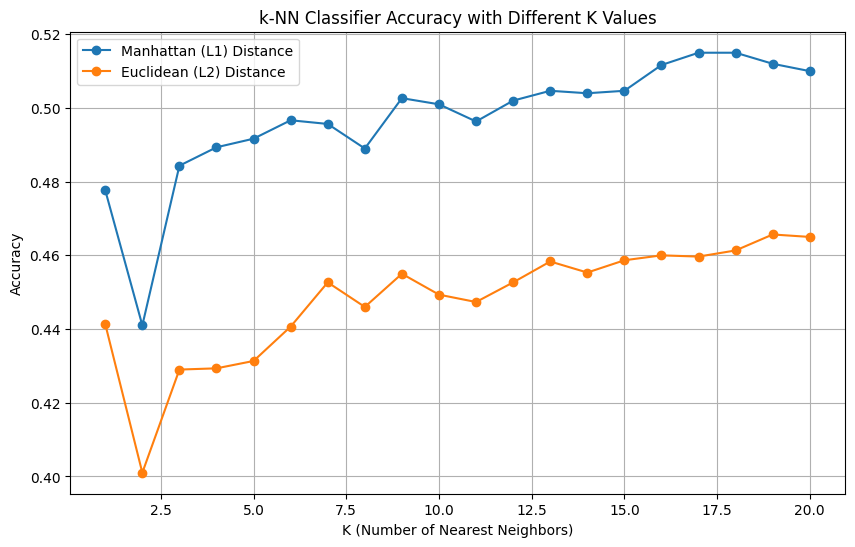

In [2]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split data into features (X) and labels (y)
X = data  # Flattened grayscale images
y = labels  # Corresponding class labels

# Define different values of K to test
k_values = range(1, 21)  # Test K values from 1 to 20

# Initialize lists to store accuracy for each distance metric
accuracy_l1 = []
accuracy_l2 = []

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each value of K
for k in k_values:
    # k-NN with Manhattan (L1) distance
    knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores_l1 = cross_val_score(knn_l1, X, y, cv=kf, scoring='accuracy')
    mean_accuracy_l1 = np.mean(scores_l1)
    accuracy_l1.append(mean_accuracy_l1)

    # k-NN with Euclidean (L2) distance
    knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores_l2 = cross_val_score(knn_l2, X, y, cv=kf, scoring='accuracy')
    mean_accuracy_l2 = np.mean(scores_l2)
    accuracy_l2.append(mean_accuracy_l2)

    # Print accuracy values for the current K
    print(f"K = {k}: Manhattan (L1) Accuracy = {mean_accuracy_l1:.4f}, Euclidean (L2) Accuracy = {mean_accuracy_l2:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_l1, label='Manhattan (L1) Distance', marker='o')
plt.plot(k_values, accuracy_l2, label='Euclidean (L2) Distance', marker='o')
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.title('k-NN Classifier Accuracy with Different K Values')
plt.legend()
plt.grid(True)
plt.show()


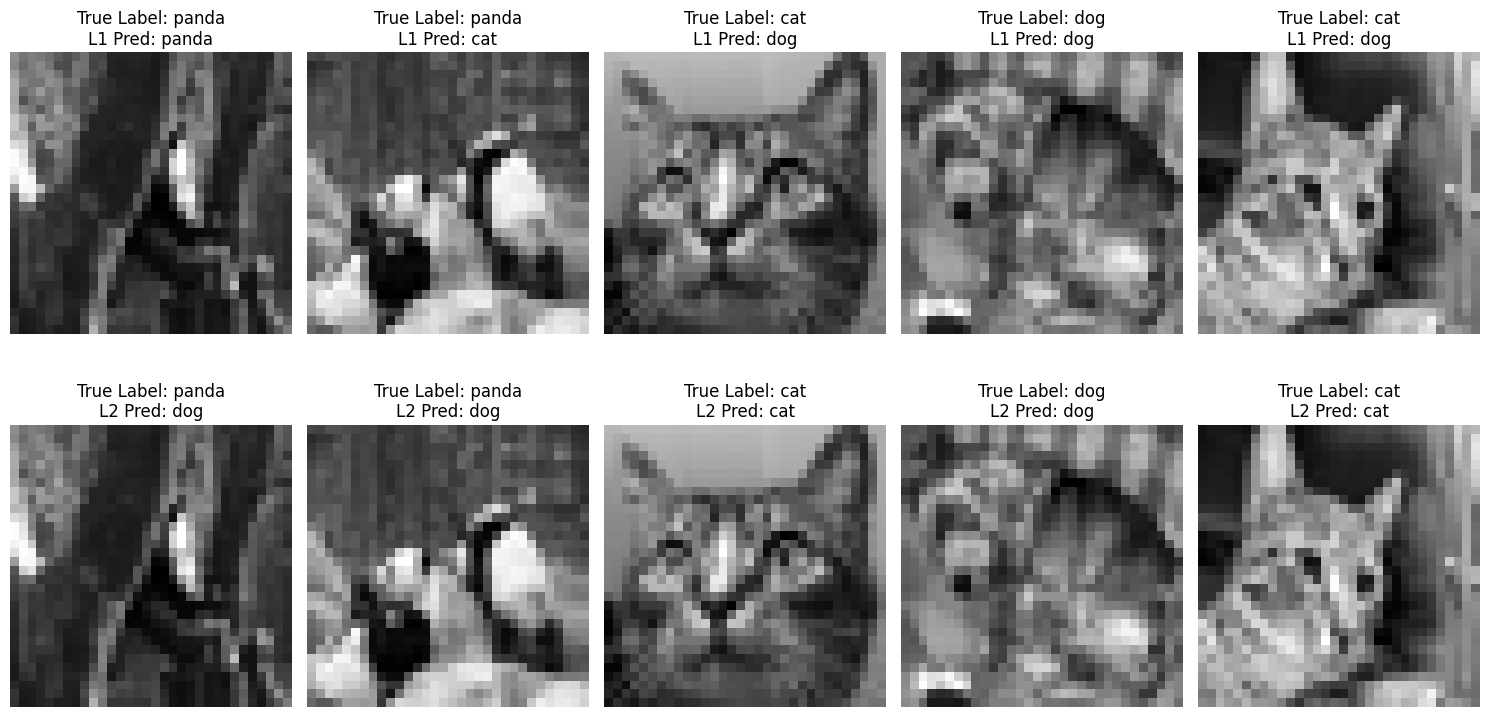

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Assuming the best K value has been determined, let's use it here
best_k = 5  # Replace with the optimal K value you found

# Define the categories based on your class labels
categories = ['cat', 'dog', 'panda']

# Train k-NN models using Manhattan (L1) and Euclidean (L2) distances
knn_l1 = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_l2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')

# Fit models on the entire dataset
knn_l1.fit(X, y)
knn_l2.fit(X, y)

# Select 5 random test images (you can replace this with specific indices if you prefer)
test_indices = np.random.choice(range(len(X)), size=5, replace=False)
test_images = X[test_indices]
test_labels = y[test_indices]

# Predict labels using both models
predictions_l1 = knn_l1.predict(test_images)
predictions_l2 = knn_l2.predict(test_images)

# Plot and compare the results
plt.figure(figsize=(15, 8))
for i, idx in enumerate(test_indices):
    # Plot original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(32, 32), cmap='gray')
    plt.title(f'True Label: {categories[test_labels[i]]}\nL1 Pred: {categories[predictions_l1[i]]}')
    plt.axis('off')

    # Plot L2 prediction
    plt.subplot(2, 5, i + 6)
    plt.imshow(test_images[i].reshape(32, 32), cmap='gray')
    plt.title(f'True Label: {categories[test_labels[i]]}\nL2 Pred: {categories[predictions_l2[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
